In [1]:
import keras
from keras import layers
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
x_test[1]

array([0.92156863, 0.92156863, 0.92156863, ..., 0.7294118 , 0.78431374,
       0.78039217], dtype=float32)

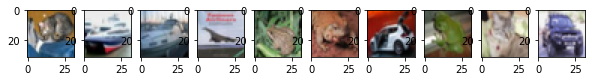

In [9]:
n = 10
plt.figure(figsize=(10, 2))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()

In [15]:
original_dim = 32 * 32 * 3
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [16]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [17]:
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [18]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [19]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1979.0330 - val_loss: 1958.6807
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1955.3396 - val_loss: 1957.7484
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1953.9835 - val_loss: 1955.8873
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1952.8834 - val_loss: 1958.9202
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1952.3650 - val_loss: 1954.2572
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1951.8973 - val_loss: 1954.8750
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1951.5103 - val_loss: 1953.5358
Epoch 8/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1951.2726 - val_loss: 1953.7538
Epoch 9/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1951.0555 - val_loss: 1954.3251
Epoch 10/100
1563/

In [20]:
x_test_encoded = encoder.predict(x_test, batch_size=32)


313/313 [==============================] - 1s 2ms/step


In [21]:
y_test=np.append(y_test,y_test)
y_test=np.append(y_test,y_test)
y_test=y_test[:30000]
print(len(y_test))

30000


In [27]:

x_test_encoded=np.array(x_test_encoded)
np.vstack(x_test_encoded)
x_test_encoded.shape
x_test_encoded=np.reshape(x_test_encoded,(30000,2))
x_test_encoded

array([[-0.1457169 ,  1.1440996 ],
       [-0.35554266, -1.093957  ],
       [ 0.05190349, -0.8850064 ],
       ...,
       [ 0.38079876,  2.8546305 ],
       [-0.07363298,  1.7270569 ],
       [-0.16494769,  0.96834993]], dtype=float32)

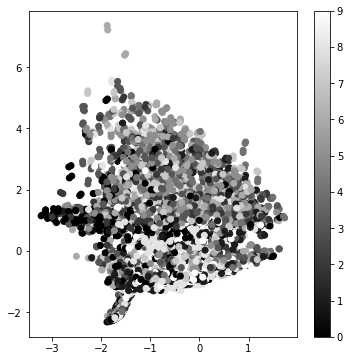

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test)
plt.colorbar()
plt.show()

In [1]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# sample of n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

NameError: name 'np' is not defined

In [2]:
plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

NameError: name 'plt' is not defined